#Carga y Exploración de Datos:



In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  f1_score, roc_auc_score, roc_curve
import joblib


In [19]:
path = '/content/drive/MyDrive/Data Science - Skillnet/Ejercicios core Machine Learning/BBDD/WineQT.csv'
df = pd.read_csv(path)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [21]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# Preprocesamiento de Datos:


In [23]:
# 1. Crear variable objetivo binaria: 1 = buena calidad (≥7), 0 = baja calidad
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [24]:
X = df.drop(columns=['quality', 'Id', 'quality_binary'])
y = df['quality_binary']


In [25]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = df[selected_features]  # Solo usar las seleccionadas

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
# 5. Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento de Modelos de Clasificación:

In [32]:
# Diccionario de modelos con hiperparámetros para GridSearchCV
model_params = {
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"]
        }
    }
}

# Entrenamiento con validación cruzada
best_models = {}
for name, config in model_params.items():
    print(f"\n Entrenando modelo: {name}")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', config['model'])
    ])
    grid = GridSearchCV(pipeline, {'clf__' + k: v for k, v in config['params'].items()},
                        cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Mejores parámetros para {name}: {grid.best_params_}")


 Entrenando modelo: KNN
Mejores parámetros para KNN: {'clf__n_neighbors': 7, 'clf__weights': 'distance'}

 Entrenando modelo: RandomForest
Mejores parámetros para RandomForest: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}

 Entrenando modelo: LogisticRegression
Mejores parámetros para LogisticRegression: {'clf__C': 10, 'clf__penalty': 'l2'}


# Evaluación de modelos


Evaluación del modelo: KNN
Matriz de confusión:
[[189   8]
 [ 13  19]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       197
           1       0.70      0.59      0.64        32

    accuracy                           0.91       229
   macro avg       0.82      0.78      0.80       229
weighted avg       0.90      0.91      0.90       229


Evaluación del modelo: RandomForest
Matriz de confusión:
[[190   7]
 [ 14  18]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       197
           1       0.72      0.56      0.63        32

    accuracy                           0.91       229
   macro avg       0.83      0.76      0.79       229
weighted avg       0.90      0.91      0.90       229


Evaluación del modelo: LogisticRegression
Matriz de confusión:
[[189   8]
 [ 20  12]]

Informe de clasificación:
              precision  

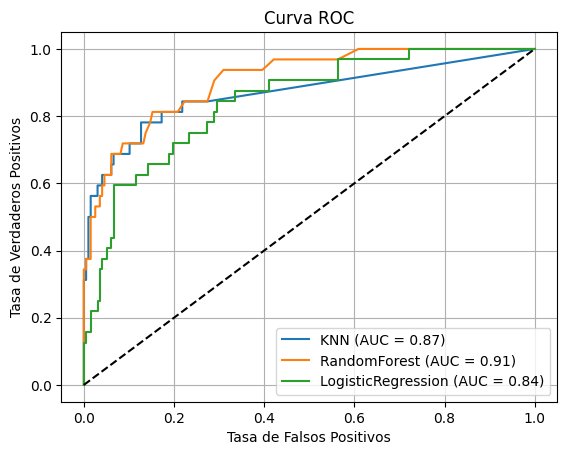

In [40]:
results = {}

for name, model in best_models.items():
    print(f"\nEvaluación del modelo: {name}")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))

    print("\nInforme de clasificación:")
    print(classification_report(y_test, y_pred))

    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results[name] = {'F1-score': f1, 'AUC': auc}

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Curva ROC combinada
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()


# Analisis

El modelo KNN fue el que mejor rendimiento ofreció, con un mayor F1-score y recall en la clase minoritaria, crucial para detectar vinos de alta calidad, y una exactitud general del 91%. Random Forest mostró buena precisión, pero menor capacidad para identificar correctamente esta clase, mientras que la regresión logística tuvo el peor desempeño en recall y F1-score. En cuanto a las ventajas y desventajas de cada modelo,  KNN es fácil de entender y efectivo sin ajustes complejos, aunque es sensible a escalado y puede ser costoso con datos grandes. Random Forest es robusto y maneja bien relaciones complejas, pero es menos interpretable. La regresión logística es rápida e interpretable, pero limita su desempeño en problemas no lineales.

# Importamos mejor modelo

In [38]:
# Guardar modelo KNN
joblib.dump(best_models["KNN"], "modelo_knn_calidad_vino.pkl")
print(" Modelo KNN exportado como 'modelo_knn_calidad_vino.pkl'")

 Modelo KNN exportado como 'modelo_knn_calidad_vino.pkl'
